In [8]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
from matplotlib import cm
import matplotlib

from constants import *
os.chdir(home_dir)

In [35]:
# san joaquin watershed
sj = sn_watersheds[sn_watersheds.name=='Upper San Joaquin']
# clip swe for every year
swe_sj = {}
for yr in range(1985,1987):
    swe = rxr.open_rasterio(data_dir + 'max_swe'+str(yr)+'.tif')
    swe = swe.rio.write_crs(sj.crs)
    clipped = swe.rio.clip(sj.geometry,all_touched=True)
    swe_sj[yr]=clipped

#clip PE fpr every year
pe_sj = {}
for yr in range(2000,2002):
    pe = rxr.open_rasterio(pe_data_dir + 'sai_'+str(yr)+'.tif')
    #pe = pe.rio.write_crs(sj.crs)
    clipped = pe.rio.clip(sj.geometry,all_touched=True)
    pe_sj[yr]=clipped

#clip GPP for every year
gpp_sj = {}
for yr in range(2000,2002):
    id = yr-2000
    gpp_means = []
    for mo in range(1,13):
        tmp = rxr.open_rasterio(data_dir + 'modis_clip_'+str(id)+'_'+str(mo)+'.tif')
        clipped = tmp.rio.clip(sj.geometry,all_touched=True)
        gpp_means.append(np.nanmean(clipped))
    max_mo = np.nanargmax(gpp_means)+1
    gpp = rxr.open_rasterio(data_dir+'modis_clip_'+str(id)+'_'+str(max_mo)+'.tif')
    clipped = gpp.rio.clip(sj.geometry,all_touched=True)
    print(max_mo)
    gpp_sj[yr]=clipped


#clip NDVI for every year
ndvi_sj = {}
for yr in range(2000,2002):
    ndvi = rxr.open_rasterio(data_dir + 'pe_snow_fires_data/max-ndvi/max-ndvi-' + str(yr)+'.tif')
    #pe = pe.rio.write_crs(sj.crs)
    clipped = ndvi.rio.clip(sj.geometry,all_touched=True)
    ndvi_sj[yr]=clipped


5
6


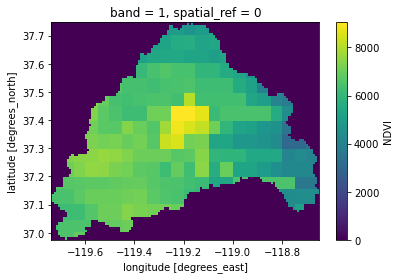